Ce code permet d'appliquer un filtre de Kalman dans le cadre où les dimensions de x_true et y sont strictement supérieur à 1.
Dans ce code on suppose que x_true et y ont la même dimension

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from numpy.linalg import inv #pour inverser une matrice
from numpy.linalg import det #pour calculer un determinant
from numpy.linalg import norm # pour calculer une norme

np.random.seed(4)

#Données 
T=100 #Nombre d'itération en temps
dim=2 # Dimension du vecteur x_true et y (ici car dimx=dim y)

# filter parameters
M=0.95*np.eye(dim) # Matrice opérateur modèle
H=np.eye(dim) #Matrice opérateur d'observation

# Generate true state and noisy observation
Q_true=np.eye(dim)
R_true=np.eye(dim)
x_true=np.zeros((dim,T))
y=np.zeros((dim,T))

# Initialisation de la RMSE,la log-vraisemblance et la Coverage probability
RMSE=np.zeros(dim)
LL=0
CP=np.zeros(dim)

# Début temps avant génerer les données et appliquer filtre +lissage de Kalman
t1=time.time()

#On génere les données
for t in range(T):
    x_true[:,t]=M@x_true[:,t-1]+np.random.multivariate_normal(np.zeros(dim),Q_true)
    y[:,t]=H@x_true[:,t]+np.random.multivariate_normal(np.zeros(dim),R_true)

# Kalman Filter

# Initial condition
xb=x_true[:,0]
B=np.eye(dim)

# Filter parameters
Q=Q_true
R=R_true

# Kalman filter (forward)
xf=np.zeros((dim,T));Pf=np.zeros((dim,dim,T));xa=np.zeros((dim,T));Pa=np.zeros((dim,dim,T))
for t in range(T):
    if t==0:
        xf[:,t]=xb
        Pf[:,:,t]=B
    else:
        xf[:,t]=M@xa[:,t-1]
        Pf[:,:,t]=M@Pa[:,:,t-1]@np.transpose(M)+Q
    K=Pf[:,:,t]@np.transpose(H)@inv(H@Pf[:,:,t]@np.transpose(H)+R)
    xa[:,t]=xf[:,t]+K@(y[:,t]-H@xf[:,t])
    Pa[:,:,t]=(np.eye(dim)-K@H)@Pf[:,:,t]

# Calcul de la log vraisemblance
l=np.zeros(T)
for k in range(T):
    l[k]=-0.5*np.transpose((y[:,k]-H@xf[:,k]))@(inv(H@Pf[:,:,k]@np.transpose(H)+R))@(y[:,k]-H@xf[:,k])-0.5*(T*np.log(2*np.pi)+np.log(det(H@Pf[:,:,k]@np.transpose(H)+R)))
LL=np.sum(l)
print("La valeur de la log-vraisemblance est:",LL)

# Kalman Smoother 
xs=np.zeros((dim,T));Ps=np.zeros((dim,dim,T))
for t in range(T-1,-1,-1):
    if t==T-1:
        xs[:,t]=xa[:,t]
        Ps[:,:,t]=Pa[:,:,t]
    else:
        Ks=Pa[:,:,t]@np.transpose(M)@inv(Pf[:,:,t+1])
        xs[:,t]=xa[:,t]+Ks@(xs[:,t+1]-xf[:,t+1])
        Ps[:,:,t]=Pa[:,:,t]+Ks@(Ps[:,:,t+1]-Pf[:,:,t+1])@np.transpose(Ks)

# Calcul de la RMSE
for k in range(dim):
    RMSE[k]=np.sqrt(np.sum((x_true[k,:]-xs[k,:])**2)/2)
print("La norme 2 de la RMSE est:",norm(RMSE,2))

# Temps de réalisation des algorithmes
t2=time.time()-t1
print("Temps d'execution du code",t2,'s')

La valeur de la log-vraisemblance est: -9376.43311810624
La norme 2 de la RMSE est: 6.990649870621268
Temps d'execution du code 0.08165812492370605 s


Puisque l'on a prit des matrices identitées pour R et Q on va afficher les deux premières composantes des vecteurs x_true et y des graphiques différents, ce qui va conduire à retrouver dans ce cas des résultats similaires à ceux qui a été réalisé en 1D 

# Graphique de la première composante des vecteurs 

 Affichage des données génerées, de xa après filtre de Kalman et xs apres lissage de Kalman pour la première composante des vecteurs

Text(0.5, 1.0, '1st component of results of Kalman smoother')

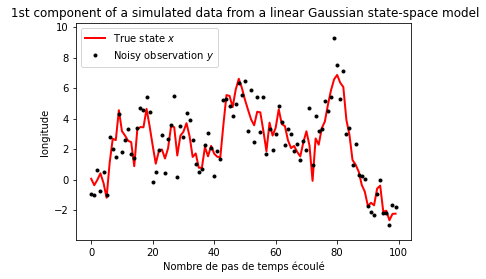

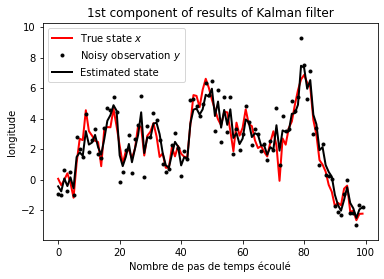

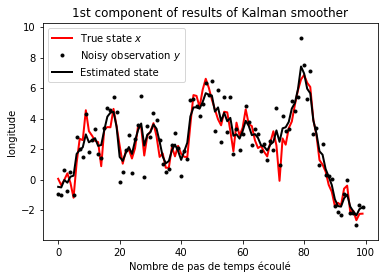

In [2]:
# Courbe de la première composante

# Données générées
line1=plt.plot(range(T),x_true[0,:],'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y[0,:],'.k',linewidth=2,label='Noisy observation $y$')
plt.legend()
plt.ylim(min(y[0,:])-1,max(y[0,:])+1)
plt.xlabel("Nombre de pas de temps écoulé")
plt.ylabel('longitude')
plt.title(' 1st component of a simulated data from a linear Gaussian state-space model')

# Après filtre de Kalman
plt.figure()
line1=plt.plot(range(T),x_true[0,:],'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y[0,:],'.k',linewidth=2,label='Noisy observation $y$')
line3=plt.plot(range(T),xa[0,:],'k',linewidth=2,label='Estimated state')
plt.legend()
plt.ylim(min(y[0,:])-1,max(y[0,:])+1)
plt.xlabel("Nombre de pas de temps écoulé")
plt.ylabel('longitude')
plt.title('1st component of results of Kalman filter')

#Lissage de Kalman
plt.figure()
line1=plt.plot(range(T),x_true[0,:],'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y[0,:],'.k',linewidth=2,label='Noisy observation $y$')
line3=plt.plot(range(T),xs[0,:],'k',linewidth=2,label='Estimated state')
plt.legend()
plt.ylim(min(y[0,:])-1,max(y[0,:])+1)
plt.xlabel("Nombre de pas de temps écoulé")
plt.ylabel('longitude')
plt.title('1st component of results of Kalman smoother')


# Graphique de la seconde composante des vecteurs 

Affichage des données génerées, de xa après filtre de Kalman et xs apres lissage de Kalman pour la seconde composante des vecteurs

Text(0.5, 1.0, '2nd component of results of Kalman smoother')

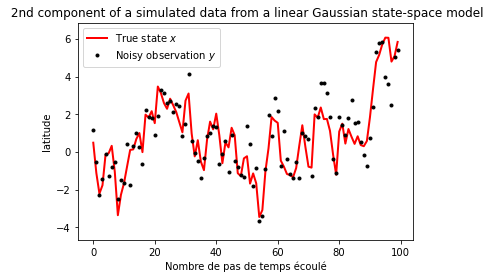

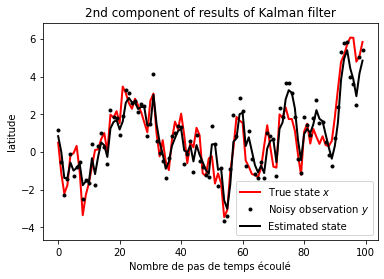

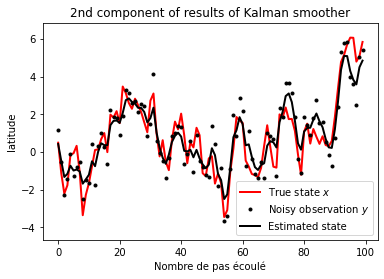

In [3]:
# Données générées
plt.figure()
line1=plt.plot(range(T),x_true[1,:],'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y[1,:],'.k',linewidth=2,label='Noisy observation $y$')
plt.legend()
plt.ylim(min(y[1,:])-1,max(y[1,:])+1)
plt.xlabel("Nombre de pas de temps écoulé")
plt.ylabel('latitude')
plt.title(' 2nd component of a simulated data from a linear Gaussian state-space model')

# Après filtre de Kalman
plt.figure()
line1=plt.plot(range(T),x_true[1,:],'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y[1,:],'.k',linewidth=2,label='Noisy observation $y$')
line3=plt.plot(range(T),xa[1,:],'k',linewidth=2,label='Estimated state')
plt.legend()
plt.ylim(min(y[1,:])-1,max(y[1,:])+1)
plt.xlabel("Nombre de pas de temps écoulé")
plt.ylabel('latitude')
plt.title('2nd component of results of Kalman filter')

#Lissage de Kalman
plt.figure()
line1=plt.plot(range(T),x_true[1,:],'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y[1,:],'.k',linewidth=2,label='Noisy observation $y$')
line3=plt.plot(range(T),xs[1,:],'k',linewidth=2,label='Estimated state')
plt.legend()
plt.ylim(min(y[1,:])-1,max(y[1,:])+1)
plt.xlabel("Nombre de pas écoulé")
plt.ylabel('latitude')
plt.title('2nd component of results of Kalman smoother')
        
    